
# Gaussian Mixture Model for Pathloss Modeling

[Unsupervised Learning/Clustering]Following result shows the behavior of Gaussian mixture models fit on data(Pathloss - Distance).
The model is a Gaussian Mixture Model with 5 components fit with the Expectation-Maximization algorithm.
$${\displaystyle L_p(d)[dB]=L_p(d_0) + 10n\log _{10}(d/d_0)+ X_{\sigma}}$$
Basic idea stems from transforming the shadowing term into probability density function instead of specific scalar value. The shadowing is modeled as a Gaussian random variable in decibels with a standard deviation and this GMM assumes that such shadowing component comprises of finite number of Gaussian components instead of a continuous linear/nonlinear curves. Each modeled cluster/component is a Gaussian distribution with mean and covariance(Multivariate Normal Distribution form). 

<img src=https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png width='350px'>
Image link from https://en.wikipedia.org/wiki/Multivariate_normal_distribution

In [120]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.io as sio

import matplotlib.pyplot as plt
from GMM.utils import plot_results

X = data_loader_pathloss("../data/PLdata_bh_34.mat")

[[  1.70237384  79.7       ]
 [  1.70755341  80.03      ]
 [  1.71267193  80.87      ]
 ...
 [  1.71228073 101.53      ]
 [  1.70636414  96.53      ]
 [  1.70036583  90.87      ]]


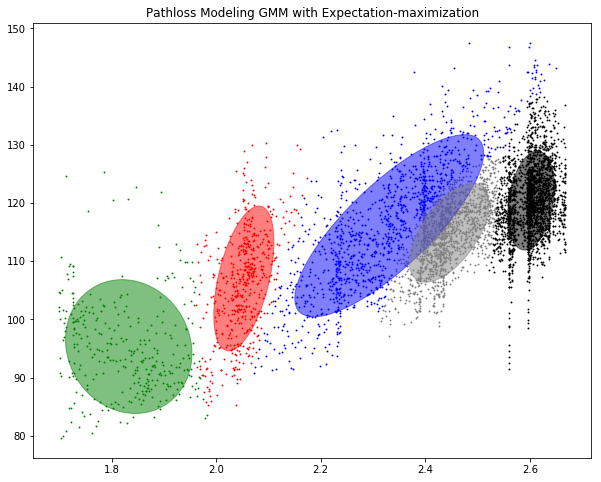

Mean Values
          distance(log)  pathloss(dB)
cluster3       1.832763     95.341299
cluster2       2.052930    107.041346
cluster1       2.331045    116.090769
cluster5       2.445971    114.861374
cluster4       2.602321    120.417763
--------------------------------------------
[cluster0] covariance matrix
               distance(log)  pathloss(dB)
distance(log)       0.016314      1.128468
pathloss(dB)        1.128468    122.383951
--------------------------------------------
[cluster1] covariance matrix
               distance(log)  pathloss(dB)
distance(log)       0.001656      0.179447
pathloss(dB)        0.179447     77.286833
--------------------------------------------
[cluster2] covariance matrix
               distance(log)  pathloss(dB)
distance(log)       0.007308     -0.072568
pathloss(dB)       -0.072568     66.065461
--------------------------------------------
[cluster3] covariance matrix
               distance(log)  pathloss(dB)
distance(log)       0.000990      

In [124]:
plt.figure(figsize=(10, 8))

# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full',
                              max_iter=5000, tol=0.000001, init_params='kmeans').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Pathloss Modeling GMM with Expectation-maximization')
mean = pd.DataFrame(gmm.means_, columns = ['distance(log)','pathloss(dB)'], index=['cluster1','cluster2','cluster3','cluster4','cluster5'])
plt.show()
print("Mean Values")
print(mean.sort_values(by=['distance(log)']))
print("--------------------------------------------")

variance = [pd.DataFrame(gmm.covariances_[i], index=['distance(log)','pathloss(dB)'], columns=['distance(log)','pathloss(dB)']) for i in range(len(gmm.covariances_))]
for i,v in enumerate(variance):
    print("[cluster"+str(i)+"] covariance matrix")
    print(v)
    print("--------------------------------------------")